In [3]:
import qiskit as q
%matplotlib inline


In [4]:
circuit = q.QuantumCircuit(2,2) # 2 qubits, 2 classical bits 
# (0,0)
circuit.x(0) #not gate that flips the value of 0th qubit
#(1,0)
circuit.cx(0,1) #cnot, controlled not, Flips 2nd qubit's value if first qubit is 1
#(1,1)


In [5]:
circuit.measure([0,1], [0,1])  
# ([qbitregister], [classicalbitregister]) Measure qubit 0 and 1 to classical bits 0 and 1
circuit.draw()


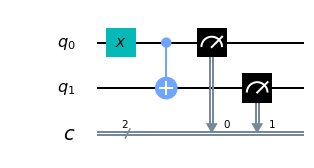

In [6]:
circuit.draw(output="mpl")

In [7]:
from qiskit import IBMQ
IBMQ.save_account(open("token.txt","r").read())


Credentials already present. Set overwrite=True to overwrite.


In [8]:
IBMQ.load_account()


/usr/local/lib/python3.7/site-packages/qiskit/providers/models/backendconfiguration.py:337: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [9]:
IBMQ.providers()


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [10]:
provider = IBMQ.get_provider('ibm-q')

In [11]:
provider.backends

IBMQBackendService(_provider=<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>, ibmq_16_melbourne=<IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>, ibmq_armonk=<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, ibmq_burlington=<IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>, ibmq_essex=<IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>, ibmq_london=<IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>, ibmq_ourense=<IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>, ibmq_qasm_simulator=<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, ibmq_vigo=<IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>, ibmqx2=<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>)

In [12]:
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 0 queued and simulated qubits
ibmqx2 has 1 queued and 5 qubits
ibmq_16_melbourne has 1 queued and 15 qubits
ibmq_vigo has 141 queued and 5 qubits
ibmq_ourense has 4 queued and 5 qubits
ibmq_london has 2379 queued and 5 qubits
ibmq_burlington has 1 queued and 5 qubits
ibmq_essex has 46 queued and 5 qubits
ibmq_armonk has 0 queued and 1 qubits


In [14]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_burlington")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


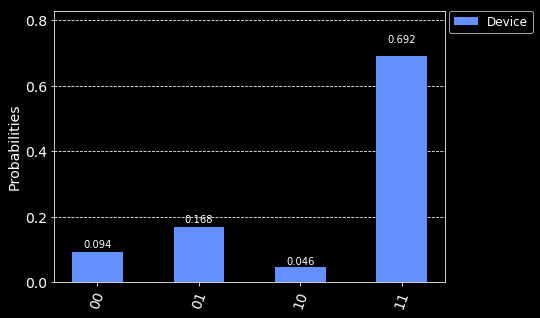

In [15]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use("dark_background") # I am using dark mode notebook, so I use this to see the chart.

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts], legend=['Device'])

In [16]:
circuit = q.QuantumCircuit(2,2)  # 2 qbits, 2 classical bits.
circuit.h(0) # Hadamard gate, puts qubit 0 into superposition
circuit.cx(0, 1) #cnot, controlled not, Flips 2nd qubit's value if first qubit is 1
circuit.measure([0,1], [0,1])  # ([qbitregister], [classicalbitregister]) Measure qubit 0 and 1 to classical bits 0 and 1

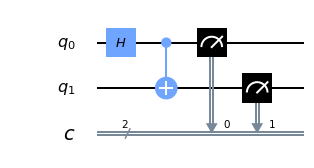

In [17]:
circuit.draw(output="mpl")

In [18]:
backend = provider.get_backend("ibmq_burlington")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


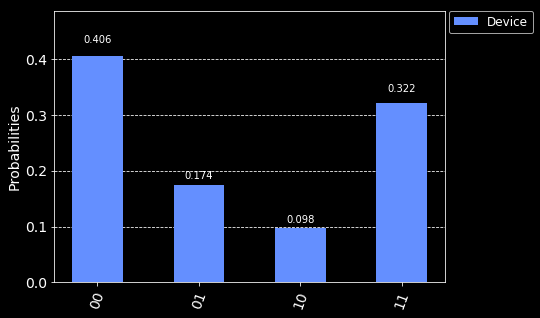

In [19]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts], legend=['Device'])

In [20]:
from qiskit import Aer  # simulator framework from qiskit

# will create a statevector of possibilities. 
sim_backend = Aer.get_backend('qasm_simulator')

Job Status: job has successfully run


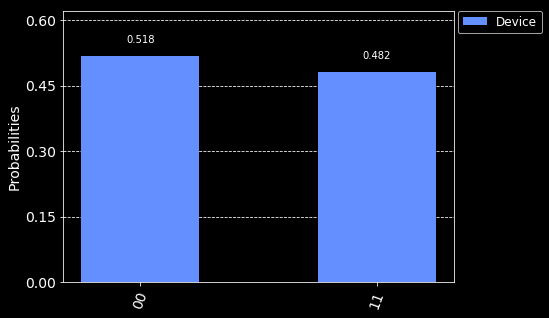

In [21]:
job = q.execute(circuit, backend=sim_backend, shots=500)
job_monitor(job)
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts], legend=['Device'])